In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

In [3]:
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

In [8]:
expt_df = pd.read_csv('/Users/dis/PycharmProjects/core_metabolome/whole_body_imaging_core_metabolome_v3.xlsx - pivot.csv')

In [11]:
df = expt_df[expt_df.FDR != 50]

In [12]:
df

,id,name,FDR,n_obs,Set,database
0,2017-07-24_19h42m31s,Servier_Ctrl_mouse_wb_lateral_plane_9aa,5,4,1,HMDB-v4
1,2017-07-24_19h42m31s,Servier_Ctrl_mouse_wb_lateral_plane_9aa,10,33,1,HMDB-v4
2,2017-07-24_19h42m31s,Servier_Ctrl_mouse_wb_lateral_plane_9aa,20,57,1,HMDB-v4
4,2017-08-03_15h09m51s,Servier_Ctrl_mouse_wb_lateral_plane_chca,5,20,2,HMDB-v4
5,2017-08-03_15h09m51s,Servier_Ctrl_mouse_wb_lateral_plane_chca,10,41,2,HMDB-v4
...,...,...,...,...,...,...
125,2017-05-17_19h49m04s,whole body xenograft (1) [RMS norm],10,166,32,core_metabolome_v3
126,2017-05-17_19h49m04s,whole body xenograft (1) [RMS norm],20,318,32,core_metabolome_v3
128,2017-05-30_06h56m05s,whole body xenograft (2) [RMS norm],5,108,33,core_metabolome_v3
129,2017-05-30_06h56m05s,whole body xenograft (2) [RMS norm],10,178,33,core_metabolome_v3


In [16]:
df.n_obs.max()

382

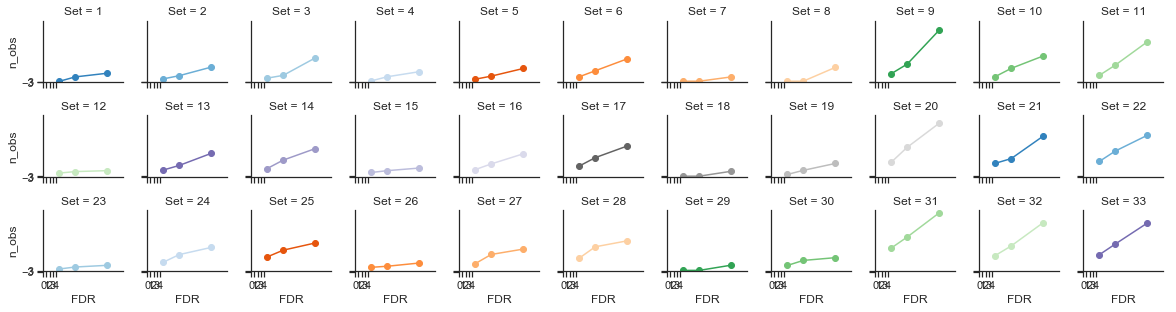

In [17]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="Set", hue="Set", palette="tab20c",
                     col_wrap=11, height=1.5)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "FDR", "n_obs", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(0, 25), ylim=(0, 400))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)